## 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following:

#### 1. Importing libraries and data and drop unneeded columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_75_updated.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Type,Category,Street Number,Street Number Suffix,Street Type,Street Name,...,Perimeter,Year opened,Year renovated,Former name,Year name changed,Number of entities,Open 24hrs,Geo Shape,URL_PLAN,Area category
0,0,0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,39.0,NaN,QUAI DE LA,SEINE,...,30.737389,2011.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
1,1,1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,6.0,S,PLACE,RAOUL DAUTRY,...,312.718568,NaN,NaN,NaN,NaN,4.0,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Large size
2,2,2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,47.0,NaN,RUE,BAUDRICOURT,...,80.353023,2005.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
3,3,3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,4.0,V,PLACE D,ITALIE,...,245.468867,1878.0,2019.0,SQUARE DE LA PLACE D'ITALIE,2013.0,1.0,Oui,"{""coordinates"": [[[2.356129760906164, 48.83152...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Very large size
4,4,4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,2.0,BIS V,PLACE,FRANZ LISTZ,...,52.677758,NaN,NaN,NaN,NaN,1.0,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size


In [6]:
df.shape

(2286, 25)

In [7]:
# Remove Unnamed columns

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [8]:
df.columns

Index(['ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN', 'Area category'],
      dtype='object')

#### Remove categorical variables because they cannot be included in k-means tasks.

In [9]:
# Remove categorical variables

df.drop(columns=['ID', 
                 'Name', 
                 'Type', 
                 'Category', 
                 'Street Number', 
                 'Street Number Suffix', 
                 'Street Type', 
                 'Street Name', 
                 'Enclosure', 
                 'Former name', 
                 'Open 24hrs', 
                 'URL_PLAN', 
                 'Area category'
                ], inplace=True)

In [10]:
df.columns

Index(['Zip code', 'Calculated area', 'Actual total area',
       'Horticultural area', 'Perimeter', 'Year opened', 'Year renovated',
       'Year name changed', 'Number of entities', 'Geo Shape'],
      dtype='object')

#### Consider scaling the data so that the difference between two variables' scale isn't too large.

In [11]:
df.describe()

,Zip code,Calculated area,Actual total area,Horticultural area,Perimeter,Year opened,Year renovated,Year name changed,Number of entities
count,2286.000000,1.975000e+03,1738.000000,1693.000000,1717.000000,1560.000000,97.000000,283.000000,2208.000000
mean,75013.715661,1.266710e+04,3891.250288,1719.078559,339.665895,2586.005769,2003.670103,1995.314488,2.528986
std,4.827219,2.770511e+05,19587.202995,7677.145167,834.370044,2102.131188,25.362259,28.199958,5.173043
min,75001.000000,0.000000e+00,0.000000,0.000000,0.000000,1688.000000,1801.000000,1907.000000,0.000000
25%,75011.000000,9.200000e+01,92.000000,85.000000,69.008122,1985.000000,2001.000000,1990.000000,1.000000
50%,75014.000000,4.800000e+02,365.500000,292.000000,179.200207,2010.000000,2010.000000,2007.000000,1.000000
75%,75018.000000,2.106500e+03,1925.000000,1103.000000,354.028685,2018.000000,2018.000000,2016.000000,2.000000
max,75020.000000,9.284926e+06,432000.000000,205911.000000,21983.980185,9999.000000,2023.000000,2023.000000,132.000000


#### Max values
    9,284,926 (Calculated area)
    432,000 (Actual total area)
    205,911 (Horticultural area)
#### Dropping the Calculated area column elminates extreme outliers.
##### I am interested in exploring: 
    1. Actual total area & Horticultural area
    2. Actual total area & Zip code
    3. Horticultural area & Zip code
    4. Year opened & Zip code
    5. Year opened & Actual total area
    6. Year opened & Horticultural area
    6. Year renovated & Zip code
    7. Year renovated & Actual total area
    8. Year renovated & Horticultural area
##### However there are too many missing values in this dataset to use k-means clustering approach on all columns.

In [12]:
# Missing values check
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the percentage of missing values for each column
missing_percentage.sort_values(ascending=False)

Year renovated        95.756780
Year name changed     87.620297
Year opened           31.758530
Horticultural area    25.940507
Perimeter             24.890639
Actual total area     23.972003
Calculated area       13.604549
Number of entities     3.412073
Geo Shape              0.087489
Zip code               0.000000
dtype: float64

##### Year renovated, Year name changed, Year opened ---> too many missing values for for k-means clustering.
##### Calculated area includes extreme outliers.
##### Perimeter, Number of entities not of interest to this analysis.
##### Geo Shape column produces value error (unable to score)

In [13]:
# Remove columns for reasons listed above

df.drop(columns=['Year renovated', 
                 'Year name changed', 
                 'Year opened', 
                 'Perimeter',
                 'Calculated area',
                 'Number of entities', 
                 'Geo Shape',
                ], inplace=True)

In [14]:
df.columns

Index(['Zip code', 'Actual total area', 'Horticultural area'], dtype='object')

In [15]:
# Check for missing values in the Actual total area and Horticultural area columns
missing_actual = df['Actual total area'].isnull()
missing_calculated = df['Horticultural area'].isnull()

# Find the overlap where both are missing
overlap_missing = missing_actual & missing_calculated

# Count the number of overlapping missing values
num_overlap_missing = overlap_missing.sum()

print(f"Number of overlapping missing values: {num_overlap_missing}")

Number of overlapping missing values: 548


In [16]:
# Check missing values for Actual total area

print(df['Actual total area'].isnull().sum())

548


In [17]:
# Check missing values for Horticultural area

print(df['Horticultural area'].isnull().sum())

593


In [18]:
# Creating a new dataset with all missing values removed
df_cleaned = df.dropna()

In [19]:
# Missing values check
missing_values = df_cleaned.isnull().sum()

In [20]:
df_cleaned.shape

(1693, 3)

### 2. The elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df_cleaned).score(df_cleaned) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

[-367261031521.9321,
 -133733503237.21149,
 -74570881435.68652,
 -53789393693.63655,
 -36116895200.98535,
 -23126092044.23537,
 -13966556012.973248,
 -10331730461.584217,
 -8641739012.246553]

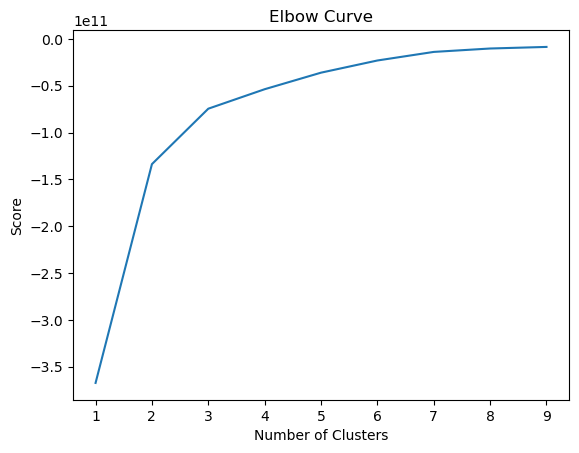

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is three.

### 3. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned)

/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [27]:
df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)

/Users/kristincpeterson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_77125/3459620578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)


In [28]:
df_cleaned.head()

,Zip code,Actual total area,Horticultural area,clusters
0,75019.0,20.0,20.0,0
1,75015.0,1100.0,1100.0,0
2,75013.0,56.0,56.0,0
3,75013.0,5400.0,2796.0,0
4,75010.0,85.0,85.0,0


In [29]:
df_cleaned['clusters'].value_counts()

clusters
0    1666
2      22
1       5
Name: count, dtype: int64

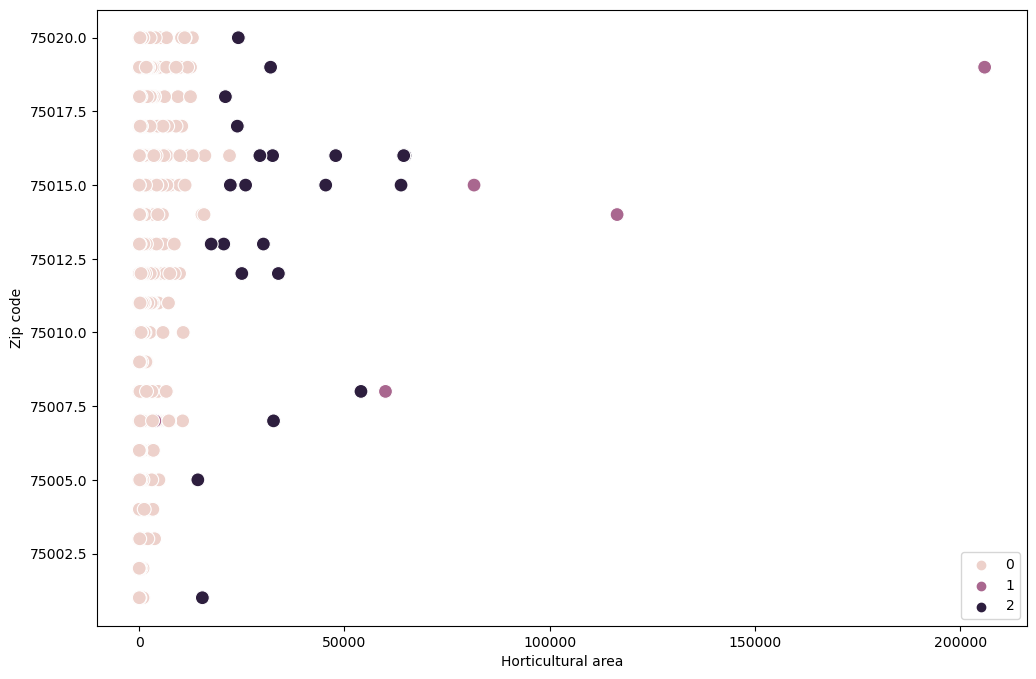

In [34]:
# Plot the clusters for the "Horticultural area" and "Zip code" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['Horticultural area'], y=df_cleaned['Zip code'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Horticultural area') # Label x-axis.
plt.ylabel('Zip code') # Label y-axis.
plt.show()

#### Across zip codes, the largest horticultural area cluster is pink (denoting small horticultural area sizes). The dark purple cluster shows the larger horticultural areas. The 4 dots of purple are the extremely large horticultural area cluster.

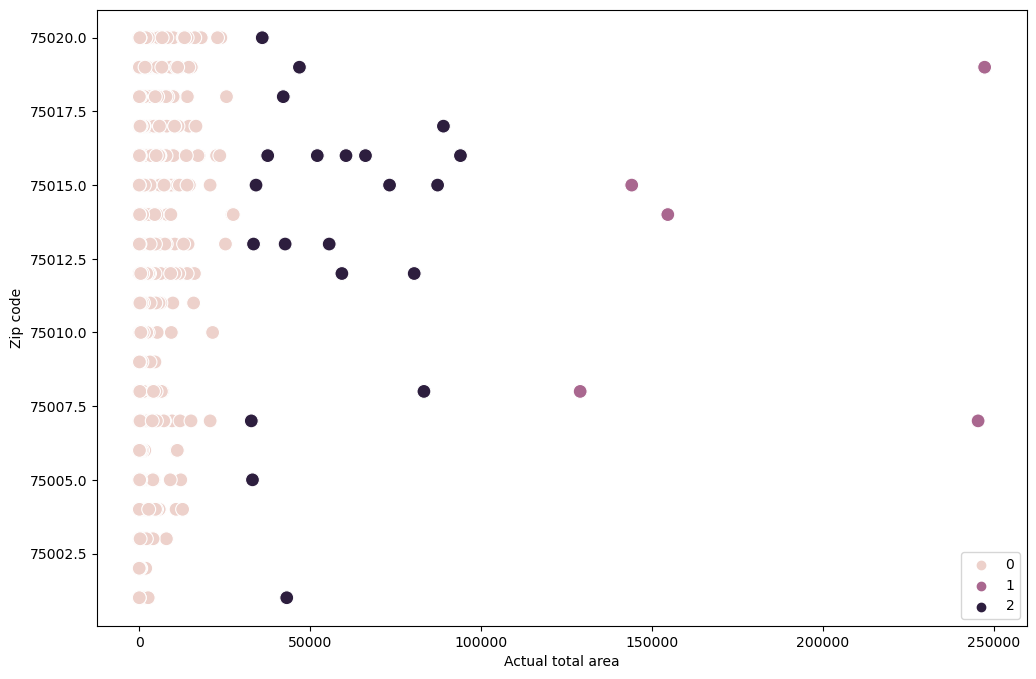

In [35]:
# Plot the clusters for the "Actual total area" and "Zip code" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['Actual total area'], y=df_cleaned['Zip code'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Actual total area') # Label x-axis.
plt.ylabel('Zip code') # Label y-axis.
plt.show()

#### Comparing Actual total area across Zip codes, we again see the predominantly pink cluster denoting smaller green spaces throughout Paris. A slightly different cluster appears for the dark purple (large green space) and purple (extremely large green space) clusters.

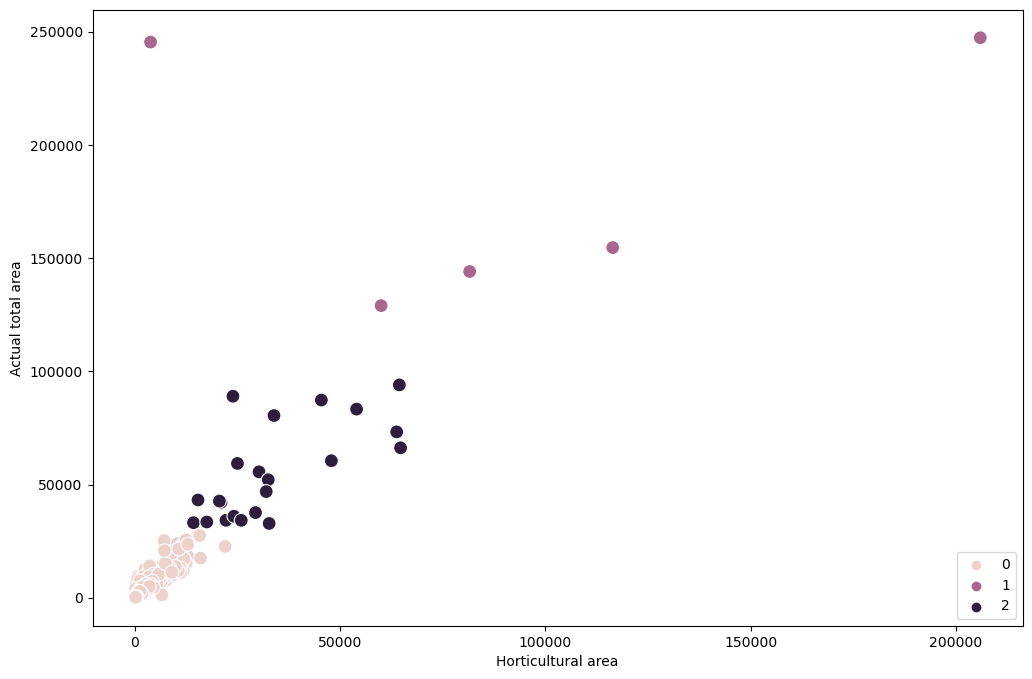

In [36]:
# Plot the clusters for the "Actual total area" and "Horticultural area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['Horticultural area'], y=df_cleaned['Actual total area'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Horticultural area') # Label x-axis.
plt.ylabel('Actual total area') # Label y-axis.
plt.show()

#### The clusters show overlap between Actual total area and Horticultural area especially for smaller-sized green spaces.

In [37]:
df_cleaned.loc[df_cleaned['clusters'] == 2, 'cluster'] = 'dark purple'
df_cleaned.loc[df_cleaned['clusters'] == 1, 'cluster'] = 'purple'
df_cleaned.loc[df_cleaned['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_77125/1668763773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[df_cleaned['clusters'] == 2, 'cluster'] = 'dark purple'


In [39]:
df_cleaned.groupby('cluster').agg({'Zip code':['mean', 'median'], 
                         'Horticultural area':['mean', 'median'], 
                         'Actual total area':['mean', 'median']})

Zip code          Horticultural area           \
                     mean   median               mean   median   
cluster                                                          
dark purple  75013.545455  75015.0       33682.863636  29825.0   
pink         75013.549820  75014.0        1021.418367    280.0   
purple       75012.600000  75014.0       93538.800000  81556.0   

            Actual total area            
                         mean    median  
cluster                                  
dark purple      55327.181818   49490.0  
pink              1643.010804     327.0  
purple          184088.800000  154640.0

#### The clusters are consistent with previous findings. 
#### Descriptive statistics for the clusters are not especially useful for this particular project. 
#### As noted in exercise 6.4, we have too few observations (less than 5,000), and removing extreme outliers may be producing unreliable results.